In [4]:
import pandas as pd
import numpy as np
import torch
import missingno as msno
import os


In [3]:
DATA_PATH = "/home/wooseok/Python_lab/recsys2023/sharechat_recsys2023_data/"
train = pd.read_csv(DATA_PATH + 'train/000000000000.csv', sep='\t')
train

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
0,2541162,51,6581,22294,5491,25604,14597,27941,18800,31372,...,3.997850,1.713364,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
1,2541260,49,20095,563,22861,15908,22651,27941,21218,869,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
2,2541318,51,20095,563,22861,25604,22651,27941,21218,31372,...,0.000000,0.000000,0.038564,1.156922,0.269948,0.0,0.0,0.0,0,0
3,2541770,64,13658,22294,7003,25604,29975,27941,21218,21533,...,1.713364,1.142243,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
4,2542002,62,20095,563,31686,15908,590,27941,18800,23218,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116469,1988207,60,23611,22294,9727,25604,21295,27941,19203,14659,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1,0
116470,1989166,54,32683,22294,21079,21545,32375,27941,19203,9638,...,5.140093,1.142243,0.038564,1.156922,0.269948,0.0,0.0,0.0,0,1
116471,1989222,58,31824,22294,6036,29304,17541,27941,19203,31372,...,2.284486,0.571121,0.115692,1.156922,0.269948,0.0,0.0,0.0,1,1
116472,1989240,49,20095,563,22861,21545,22651,27941,19203,869,...,0.000000,0.000000,0.000000,1.156922,0.192820,0.0,0.0,0.0,0,1


In [14]:
train = pd.concat([pd.read_csv(DATA_PATH + 'train/' + filename, sep='\t') for filename in sorted(os.listdir(DATA_PATH + 'train/'))])

train

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,is_clicked,is_installed
0,2541162,51,6581,22294,5491,25604,14597,27941,18800,31372,...,3.997850,1.713364,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
1,2541260,49,20095,563,22861,15908,22651,27941,21218,869,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
2,2541318,51,20095,563,22861,25604,22651,27941,21218,31372,...,0.000000,0.000000,0.038564,1.156922,0.269948,0.0,0.0,0.0,0,0
3,2541770,64,13658,22294,7003,25604,29975,27941,21218,21533,...,1.713364,1.142243,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
4,2542002,62,20095,563,31686,15908,590,27941,18800,23218,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115915,1988041,62,12577,22294,2059,25604,18309,27941,21218,23218,...,0.000000,0.000000,0.000000,0.231384,0.000000,0.0,0.0,0.0,0,0
115916,1988471,45,27426,22294,11338,21545,25991,27941,19203,6675,...,1.142243,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0
115917,1988651,56,26325,22294,9018,25604,943,27941,21218,869,...,1.142243,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
115918,1988792,48,31824,22294,6036,19475,9209,27941,19203,23218,...,2.284486,1.713364,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0


<Axes: >

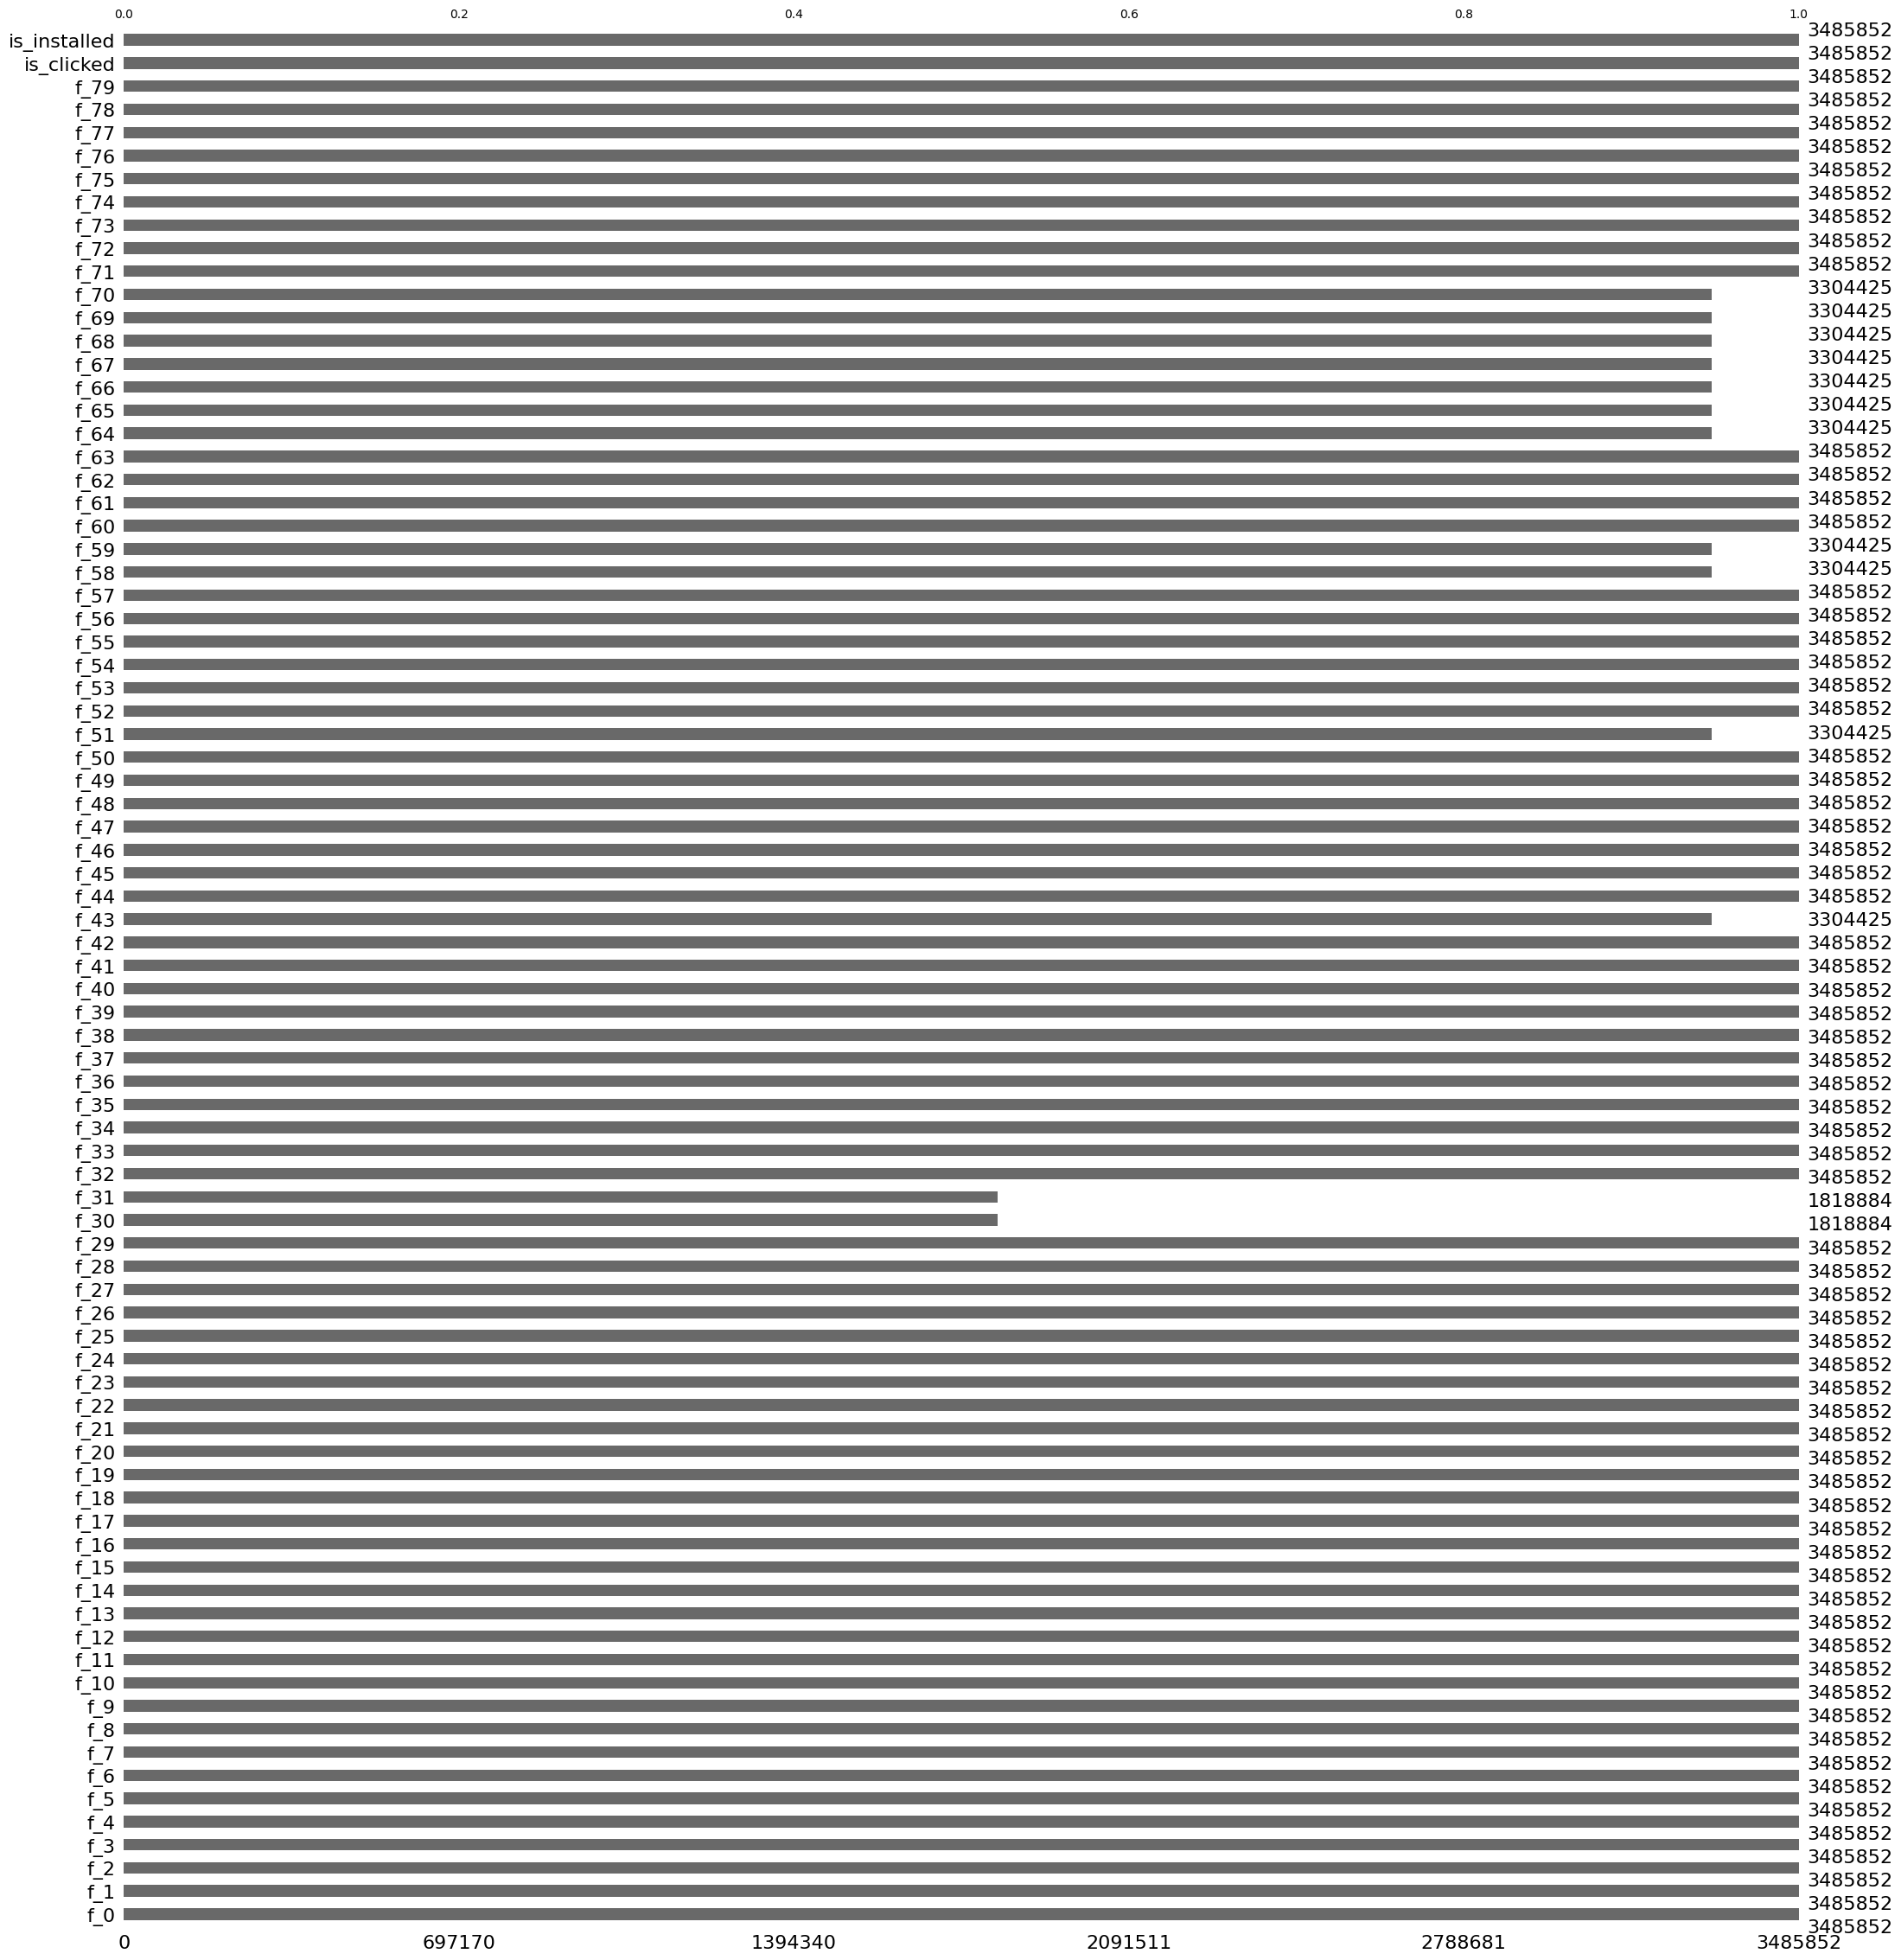

In [15]:
msno.bar(train)

## 계획
1. MF
2. LightGBM, Catboost
3. 

In [26]:
FEATURES = [
    'RowId', 
    'Date',
    *['Cat'+str(i) for i in range(1, 32)],
    *['Bin'+str(i) for i in range(1, 10)],
    *['Num'+str(i) for i in range(1, 39)],
    'is_clicked', 'is_installed'
]

train = train.rename(columns=dict(zip(train.columns, FEATURES)))
train

,RowId,Date,Cat1,Cat2,Cat3,Cat4,Cat5,Cat6,Cat7,Cat8,...,Num31,Num32,Num33,Num34,Num35,Num36,Num37,Num38,is_clicked,is_installed
0,2541162,51,6581,22294,5491,25604,14597,27941,18800,31372,...,3.997850,1.713364,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
1,2541260,49,20095,563,22861,15908,22651,27941,21218,869,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
2,2541318,51,20095,563,22861,25604,22651,27941,21218,31372,...,0.000000,0.000000,0.038564,1.156922,0.269948,0.0,0.0,0.0,0,0
3,2541770,64,13658,22294,7003,25604,29975,27941,21218,21533,...,1.713364,1.142243,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
4,2542002,62,20095,563,31686,15908,590,27941,18800,23218,...,0.000000,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115915,1988041,62,12577,22294,2059,25604,18309,27941,21218,23218,...,0.000000,0.000000,0.000000,0.231384,0.000000,0.0,0.0,0.0,0,0
115916,1988471,45,27426,22294,11338,21545,25991,27941,19203,6675,...,1.142243,0.000000,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0
115917,1988651,56,26325,22294,9018,25604,943,27941,21218,869,...,1.142243,0.000000,0.115692,1.156922,0.269948,0.0,0.0,0.0,0,0
115918,1988792,48,31824,22294,6036,19475,9209,27941,19203,23218,...,2.284486,1.713364,0.000000,1.156922,0.269948,0.0,0.0,0.0,0,0


In [31]:
# train.to_parquet('data/processed/train_concat.parquet', index=None)



In [ ]:
# load processed train file
# train = pd.read_parquet('data/processed/train_concat.parquet')

### 1. LightGBM

In [37]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.ensemble import KF
 

In [46]:
pd.set_option('display.max_rows', 50)

Cat29, Cat30 이 결측치 50%

In [47]:
target = ['is_clicked', 'is_installed']
pd.DataFrame(train.dtypes)

,0
RowId,int64
Date,int64
Cat1,int64
Cat2,int64
Cat3,int64
...,...
Num36,float64
Num37,float64
Num38,float64
is_clicked,int64


In [79]:
# cat29, cat30이 0이 압도적으로 많으므로 결측치를 0으로 채우기
train.loc[:, ['Cat29', 'Cat30']] = train.loc[:, ['Cat29', 'Cat30']].fillna(0)
train = train.astype({'Cat29':int, 'Cat30':int})
train.loc[:, ['Cat29', 'Cat30']]

,Cat29,Cat30
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
115915,0,0
115916,0,0
115917,0,0
115918,0,0


In [54]:
cat_features = [
    'RowId', 'Date', 'Cat1', 'Cat2', 'Cat3', 'Cat4', 'Cat5', 'Cat6', 'Cat7',
       'Cat8', 'Cat9', 'Cat10', 'Cat11', 'Cat12', 'Cat13', 'Cat14', 'Cat15',
       'Cat16', 'Cat17', 'Cat18', 'Cat19', 'Cat20', 'Cat21', 'Cat22', 'Cat23',
       'Cat24', 'Cat25', 'Cat26', 'Cat27', 'Cat28', 'Cat29', 'Cat30', 'Cat31',
       'Bin1', 'Bin2', 'Bin3', 'Bin4', 'Bin5', 'Bin6', 'Bin7', 'Bin8', 'Bin9'
]

num_features = [
    'Num1', 'Num2', 'Num3', 'Num4', 'Num5', 'Num6', 'Num7', 'Num8', 'Num9',
       'Num10', 'Num11', 'Num12', 'Num13', 'Num14', 'Num15', 'Num16', 'Num17',
       'Num18', 'Num19', 'Num20', 'Num21', 'Num22', 'Num23', 'Num24', 'Num25',
       'Num26', 'Num27', 'Num28', 'Num29', 'Num30', 'Num31', 'Num32', 'Num33',
       'Num34', 'Num35', 'Num36', 'Num37', 'Num38'
]